# Данные 
В некотором *городе N* на каждом автобусе/троллейбусе/трамвае установлены GPS трекеры, которые с некоторым промежутком времени передают информацию о своем местоположении на специальный сервер. 

Данные для всех транспортных средства одного маршрута непрерывно записывались на протяжении недели, потом GPS координаты (широта и долгота) были спроецированы на плоскость с использованием [проекции Меркатора](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_%D0%9C%D0%B5%D1%80%D0%BA%D0%B0%D1%82%D0%BE%D1%80%D0%B0) и некоторого линейного преобразования. Эти данные записаны в файле **../data/transport_log.zip** в виде:

>    **1447037729**&nbsp;&nbsp;&lt;tab&gt;&nbsp;&nbsp;**3054.619968**&nbsp;&nbsp;&lt;tab&gt;&nbsp;&nbsp;**2409.828279**&nbsp;&nbsp;&lt;tab&gt;&nbsp;&nbsp;**570d8**

поля разделены табуляцией. Здесь:
- **1447037729** - [UNIX-время](https://ru.wikipedia.org/wiki/UNIX-%D0%B2%D1%80%D0%B5%D0%BC%D1%8F), которое без труда можно преобразовать во что-то разумное с помощью стандартной библиотеки [Python](https://docs.python.org/2/library/datetime.html#datetime.date.fromtimestamp).
- **3054.619968** - координата "x"
- **2409.828279** - координата "y"
- **570d8** - уникальный идентификатор транспортного средства, от которого получен сигнал. 

Маршрут автобосов "туда" не совпадает с маршрутом "обратно". Известно, что в направлении, которое мы назовем "туда"  первая остановка имеет координаты:

>   **(11038.08464497, 8253.17542416)**

последняя:

>   **(283.08479678,  163.45489494)**


# Задачи

- Отобразить все точки на плоскости

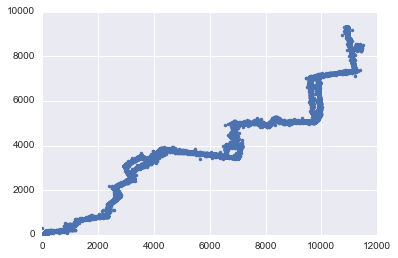

In [2]:
import numpy as np
import zipfile
import io
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

with zipfile.ZipFile('../data/transport_log.zip', 'r') as zf:
    with zf.open('transport_log.txt', 'r') as f:
        fu = io.TextIOWrapper(f, 'utf-8')
        x = []
        y = []
        for line in fu:
            x.append(float(line.split()[1]))
            y.append(float(line.split()[2]))

plt.plot(x, y, '.')
plt.show()
            
        
       
        
        
        

- Отобразить в bar plot зависимость числа точек от часа (0-23). По оси "X" столбцы с метками 0-23, по оси "Y" - число соответствующих точек в логе.

<Container object of 24 artists>

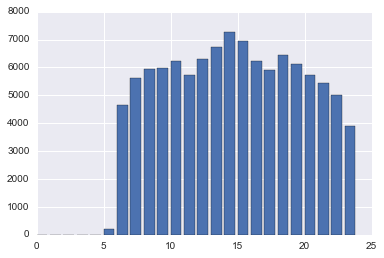

In [7]:
import numpy as np
import zipfile
import io
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

with zipfile.ZipFile('../data/transport_log.zip', 'r') as zf:
    with zf.open('transport_log.txt', 'r') as f:
        fu = io.TextIOWrapper(f, 'utf-8')
        hours = []
        for line in fu:
            hours.append((datetime.datetime.fromtimestamp(int(line.split()[0]))).hour)
            
hrs = np.arange(0, 24)
hrs.resize(2, 24)
hrs1=hrs[0]
for i in range (0, len(hrs[1])):
    for j in range (0, len(hours)):
        if hours[j]==hrs1[i]:
            hrs[1][i]=hrs[1][i]+1
            

plt.bar(hrs[0], hrs[1])


- Выделить из лога подпоследовательности, соответствующие гарантировано полным маршрутам в направлении "туда". То есть автобус должен пройти первую остановку с обозначенными выше координатами, затем последнюю.

- По данным из предыдущего пункта построить приближенный маршрут в виде кусочно-линейно функции, причем линейные компоненты должны иметь одинаковую длину. Отобразить таким образом, чтобы каждый участок имел цвет в зависимости от средней скорости прохождения участка. 